<font color="white">.</font> | <font color="white">.</font> | <font color="white">.</font>
-- | -- | --
![NASA](https://media.licdn.com/dms/image/C560BAQGt_i7kDfJ1Sg/company-logo_200_200/0/1624812877012?e=1682553600&v=beta&t=kRNhTWBDTghUKz-6kWXjz5enuFdkkiWO4vdXBs_F17U) | <h1><font size="+7">Machine Learning in Practice</font></h1> 
---

<center>
    <h1><font color="blue">Machine Learning with Scikit-Learn</font></h1>
</center>

In [ ]:
#@title format setting
%%html
<!DOCTYPE html>
<html lang="en">
  <head> </head>
  <body>
<script src="https://bot.voiceatlas.mysmce.com/v1/chatlas.js"></script>
<app-chatlas
	atlas-id="f759a188-f8bb-46bb-9046-3b1b961bd6aa"
	widget-background-color="#3f51b5ff"
	widget-text-color="#ffffffff"
	widget-title="Chatlas">
</app-chatlas>
  </body>
</html>

## Useful Links

- <a href="https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660">Calculating Simple Linear Regression and Linear Best Fit an In-depth Tutorial with Math and Python</a>
- <a href="https://scikit-learn.org/stable/tutorial/index.html">scikit-learn Tutorials</a>
- <a href="https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a">Sklearn Linear Regression Tutorial with Boston House Dataset</a>
- <a href="https://www.dataquest.io/blog/sci-kit-learn-tutorial/">Scikit-learn Tutorial: Machine Learning in Python</a>

# <font color="red">Scikit-Learn</font>

- Scikit-learn is a free machine learning library for Python. 
- Provides a selection of efficient tools for machine learning and statistical modeling including: 
     - **Classification:** Identifying which category an object belongs to. Example: Spam detection
     - **Regression:** Predicting a continuous variable based on relevant independent variables. Example: Stock price predictions
     - **Clustering:** Automatic grouping of similar objects into different clusters. Example: Customer segmentation 
     - **Dimensionality Reduction:** Seek to reduce the number of input variables in training data by preserving the salient relationships in the data
- Features various algorithms like support vector machine, random forests, and k-neighbours.
- Supports Python numerical and scientific libraries like NumPy and SciPy.


Some popular groups of models provided by scikit-learn include:

- **Clustering:** Group unlabeled data such as KMeans.
- **Cross Validation:** Estimate the performance of supervised models on unseen data.
- **Datasets:** for test datasets and for generating datasets with specific properties for investigating model behavior.
- **Dimensionality Reduction:** Reduce the number of attributes in data for summarization, visualization and feature selection such as Principal component analysis.
- **Ensemble Methods:** Combine the predictions of multiple supervised models.
- **Feature Extraction:** Define attributes in image and text data.
- **Feature Selection:** Identify meaningful attributes from which to create supervised models.
- **Parameter Tuning:** Get the most out of supervised models.
- **Manifold Learning:** Summarize and depicting complex multi-dimensional data.
- **Supervised Models:** A vast array not limited to generalized linear models, discriminate analysis, naive bayes, lazy methods, neural networks, support vector machines and decision trees.
- **Unsupervised Learning Algorithms:** − They include clustering, factor analysis, PCA (Principal Component Analysis), unsupervised neural networks.


![fig_sckl](https://ulhpc-tutorials.readthedocs.io/en/latest/python/advanced/scikit-learn/images/scikit.png)
Image Source: ulhpc-tutorials.readthedocs.io

## Package Requirements

- Numpy
- scipy
- matplotlib
- pandas
- scikit-learn
- seaborn

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#@title install packages
%matplotlib inline 
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [ ]:
#@title import packages
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
print(f"Numpy version:        {np.__version__}")
print(f"Pandas version:       {pd.__version__}")
print(f"Seaborn version:      {sns.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Numpy version:        1.21.6
Pandas version:       1.3.5
Seaborn version:      0.11.2
Scikit-Learn version: 1.0.2


# <font color="blue">Numerical Data</font>

## <font color="red">Boston Dataset</font>
- Contains information about different houses in Boston.
- There are 506 samples and 13 feature variables in this dataset. 
- Maintained at Carnegie Mellon University.
- <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/">This is a copy of UCI ML housing dataset</a>.

We want to predict the value of prices of the house using the given features. 

### Obtain the Dataset

In [ ]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [ ]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Features of the Dataset

In [ ]:
print("Keys: ", boston_data.keys())

Keys:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
print("Shape: ", boston_data.data.shape)

Shape:  (506, 13)


In [ ]:
print("Feature Names: ", boston_data.feature_names)

Feature Names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Attribute Information:
| Acronym | Description |
| --- | --- |
| **CRIM** |    Per capita crime rate by town |
|**ZN** |   Proportion of residential land zoned for lots over 25,000 sq.ft. |
| **INDUS** | Proportion of non-retail business acres per town |
| **CHAS** |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| **NOX** |  Nitric oxides concentration (parts per 10 million) |
| **RM** |    Average number of rooms per dwelling |
| **AGE** |   roportion of owner-occupied units built prior to 1940 |
| **DIS** |  weighted distances to five Boston employment centres |
| **RAD** |   index of accessibility to radial highways |
| **TAX** |  full-value property-tax rate per \$10,000 |
| **PTRATIO** |  pupil-teacher ratio by town |
| **B** |       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| **LSTAT** |    % lower status of the population |
| **MEDV** |    Median value of owner-occupied homes in $1000's |

## <font color="red">Extract Data</font>

**Pass the data into a Pandas dataframe**

In [ ]:
bos_pd = pd.DataFrame(boston_data.data)
bos_pd.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
bos_pd.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
bos_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
bos_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### Relabel the columns using the Boston dataset feature names

In [ ]:
bos_pd.columns = boston_data.feature_names
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Add home prices to the Pandas dataframe

In [ ]:
boston_data.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [ ]:
print("Shape of the target data: ", boston_data.target.shape)

Shape of the target data:  (506,)


In [ ]:
bos_pd['PRICE']=boston_data.target
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Check the types of features:

In [ ]:
bos_pd.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

## <font color="red">Exploratory Data Analysis</font>

- Important step before training the model. 
- We use statistical analysis and visualizations to understand the relationship of the target variable with other features.

#### Check Missing Values
It is a good practice to see if there are any missing values in the data. 

Count the number of missing values for each feature

In [ ]:
bos_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Mengecek missing values
missing = df.isna().sum()

# Mengisi missing values di kolom 'RM' dengan nilai rata-rata dari kolom 'RM'
mean_rm = df['RM'].mean()
df['RM'].fillna(mean_rm, inplace=True)

# Mengisi missing values di kolom 'LSTAT' dengan nilai rata-rata dari kolom 'LSTAT'
mean_lstat = df['LSTAT'].mean()
df['LSTAT'].fillna(mean_lstat, inplace=True)

print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

#### Obtain basic statistics on the data

In [ ]:
bos_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
bos_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
bos_pd.describe().transpose().dtypes

count    float64
mean     float64
std      float64
min      float64
25%      float64
50%      float64
75%      float64
max      float64
dtype: object

#### Distribution of the target variable

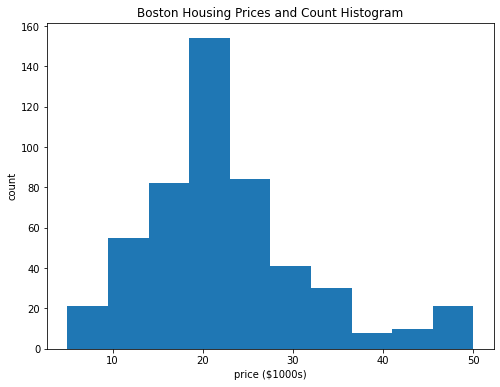

In [ ]:
plt.figure(figsize=(8, 6));
plt.hist(bos_pd['PRICE']);
plt.title('Boston Housing Prices and Count Histogram');
plt.xlabel('price ($1000s)');
plt.ylabel('count');
plt.show();

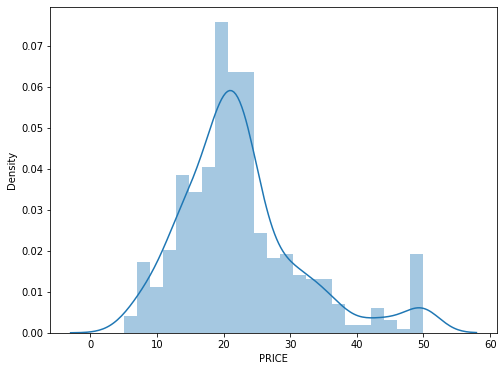

In [ ]:
plt.figure(figsize=(8, 6));
sns.distplot(bos_pd['PRICE']);

In [ ]:
df = bos_pd
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill")
fig.show()

From the above output we can see that the values of PRICE is normally distributed with some of the outliers.

#### Heatmap: Two-Dimensional Graphical Representation
- Represent the individual values that are contained in a matrix as colors.
- Create a correlation matrix that measures the linear relationships between the variables.

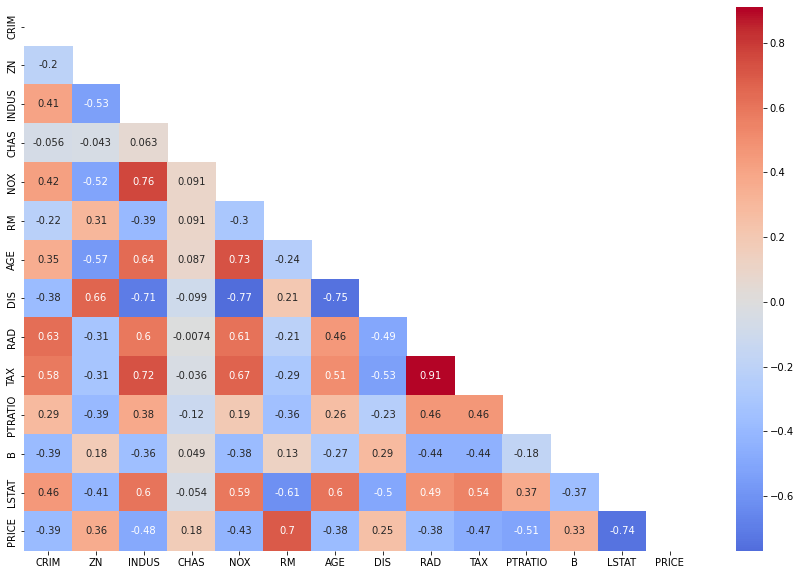

In [ ]:
# Membuat heatmap korelasi
corr = bos_pd.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, center=0)
plt.show()


In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 4.9 

In [ ]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
create_report(df).show()

ImportError: ignored

- **RM** has a strong positive correlation with **PRICE** (0.7) where as **LSTAThas** a high negative correlation with **PRICE** (-0.74).
- The features **RAD**, **TAX** have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. Same goes for the features **DIS** and **AGE** which have a correlation of -0.75.
- The predictor variables such as **CRIM**, **INDUS**, **NOX**, **Age**, **RAD**, **TAX**, **PTRATIO**, **LSTAT** have a negative correlation on the target. Increase of any of them leads to the decrease in the price of the housing.
- The predictor variables such as **ZN**, **RM**, **DIS**, **B** have good positive correlation with the target. Increase in any of them leads to the increase in the price of the house.

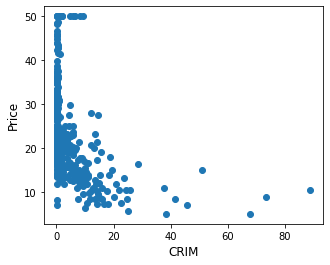

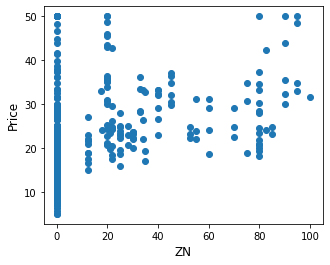

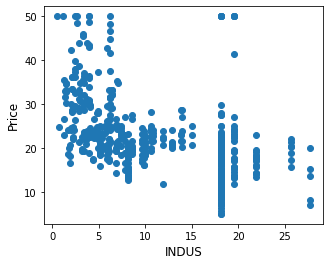

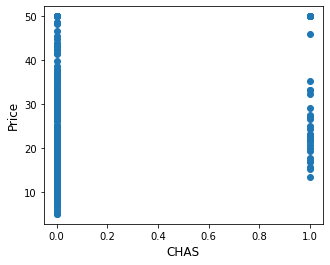

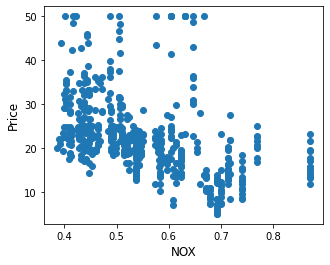

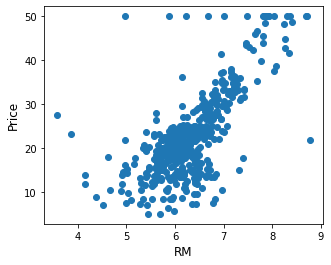

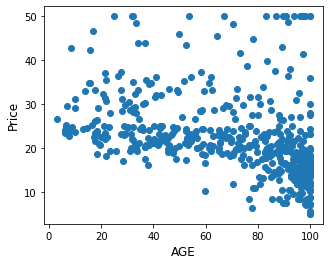

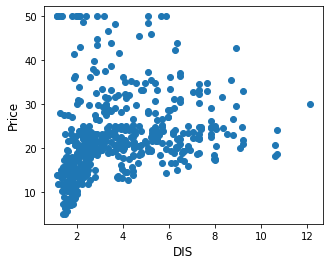

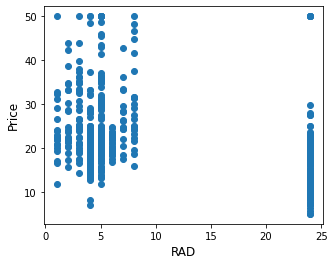

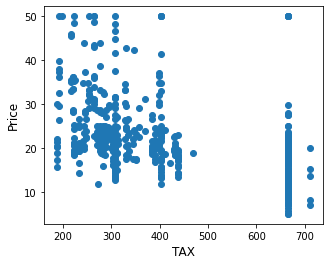

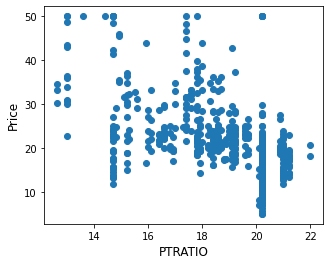

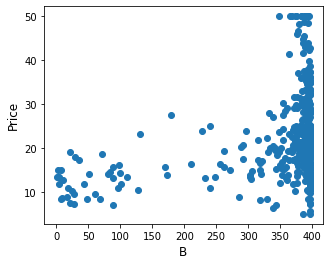

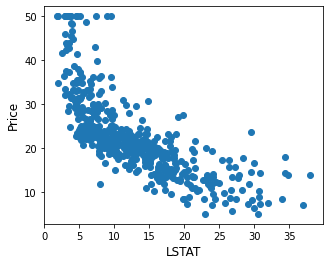

In [ ]:
for feature_name in boston_data.feature_names:
    plt.figure(figsize=(5, 4));
    plt.scatter(bos_pd[feature_name], bos_pd['PRICE']);
    plt.ylabel('Price', size=12);
    plt.xlabel(feature_name, size=12);
plt.show();

- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

Based on the above observations we will plot an `lmplot` between **RM** and **PRICE** to see the relationship between the two more clearly.

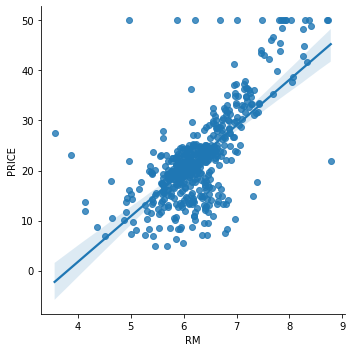

In [ ]:
sns.lmplot(x = 'RM', y = 'PRICE', data = bos_pd);

## <font color="blue">Model Selection Process</font>

![fig_skl](https://miro.medium.com/max/1400/1*LixatBxkewppAhv1Mm5H2w.jpeg)
Image Source: Christophe Bourguignat

- A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable. 
- We need to divide the entire data set into two sets:
    + Training set on which we are going to train our algorithm to build a model. 
    + Testing set on which we will test our model to see how accurate its predictions are.
    
Before we create the two sets, we need to identify the algorithm we will use for our model.
We can use the `machine_learning_map` map (shown at the top of this page) as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. Using the checklist let’s see under which category our current dataset falls into:
- We have 506 samples: >50? (**Yes**)
- Are we predicting a category? (**No**)
- Are we predicting a quantity? (**Yes**)

Based on the checklist that we prepared above and going by the `machine_learning_map` we can try out **regression methods** such as:

- Linear Regression 
- Lasso
- ElasticNet Regression
- Ridge Regression: 
- K Neighbors Regressor
- Decision Tree Regressor
- Simple Vector Regression (SVR)
- Ada Boost Regressor
- Gradient Boosting Regressor
- Random Forest Regression
- Extra Trees Regressor

Check the following documents on regresssion: 
<a href="https://scikit-learn.org/stable/supervised_learning.html">Supervised learning--scikit-learn</a>,
<a href="https://developer.ibm.com/technologies/data-science/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/">Learn regression algorithms using Python and scikit-learn</a>,
<a href="https://www.pluralsight.com/guides/non-linear-">Non-Linear Regression Trees with scikit-learn</a>.

## <font color="red">Simple Linear Model</font>
- It is difficult to visualize the multiple features.
- We want to predict the house price with just one variable and then move to the regression with all features.
- Because **RM** shows positive correlation with the **House Prices**, we will use **RM** for the model.

In [ ]:
X_rooms = bos_pd.RM
y_price = bos_pd.PRICE


X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


#### Splitting the data into training and testing sets
- We split the data into training and testing sets. 
- We train the model with 80% of the samples and test with the remaining 20%. 
- We do this to assess the model’s performance on unseen data.

In [ ]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = \
             train_test_split(X_rooms, y_price, test_size = 0.2, random_state=12312)

print(X_train_1.shape)
print(Y_train_1.shape)
print(X_test_1.shape)
print(Y_test_1.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


#### Training and testing the model
- We use scikit-learn’s LinearRegression to train our model on both the training and check it on the test sets.
- We check the model performance on the train dataset.

In [ ]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 6.5891218851761355
R2 score is 0.45


#### Model Evaluation for Test Set

In [ ]:
y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 6.6635885642532635
R^2: 0.59


The coefficient of determination: 1 is perfect prediction

In [ ]:
print(f'Coefficient of determination: {metrics.r2_score(Y_test_1, y_pred_1) :.4f}')

Coefficient of determination: 0.5883


#### 45-Degree Plot

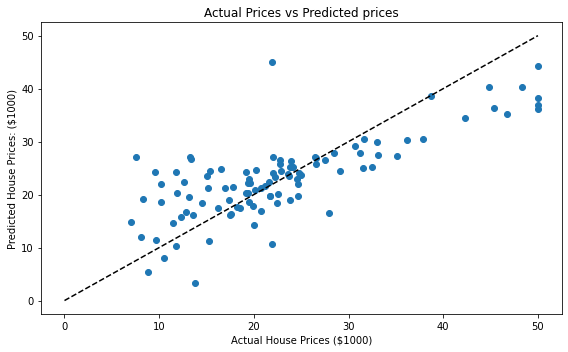

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(Y_test_1, y_pred_1);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

## <font color="red">Linear Regression Model with All Variables</font>
- We want to create a model considering all the features in the dataset.

#### Create the Model

In [ ]:
X = bos_pd.drop('PRICE', axis = 1)
y = bos_pd['PRICE']

- Use the `train_test_split` to split the data into random train and test subsets.
- Everytime you run it without specifying `random_state`, you will get a different result.
- If you use `random_state=some_number`, then you can guarantee the split will be always the same.
- It doesn't matter what the value of `random_state` is:  42, 0, 21, ...
- This is useful if you want reproducible results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

The linear regression model:

In [ ]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

#### Model Evaluation for Training Set

In [ ]:
y_train_predict = reg_all.predict(X_train)

In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75


#### Model Evaluation for Test Set

In [ ]:
y_pred = reg_all.predict(X_test)

In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665329
R^2: 0.67


The coefficient of determination: 1 is perfect prediction

In [ ]:
print(f'Coefficient of determination: {metrics.r2_score(y_test, y_pred) :.4f}')

Coefficient of determination: 0.6688


#### Error Distribution

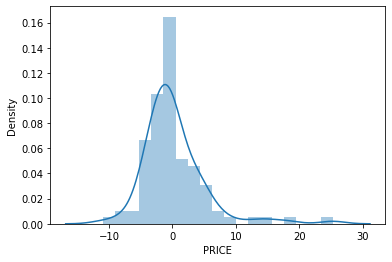

In [ ]:
sns.distplot(y_test - y_pred);

#### 45-Degree Plot

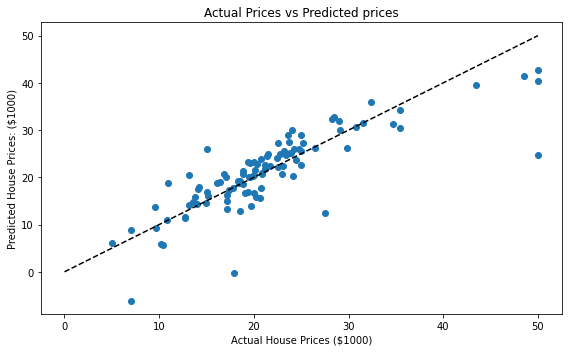

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, y_pred);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

In [ ]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred) ** 2)))

RMS: 4.928602182665329 


In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

,Actual,Predicted
173,23.6,28.996724
274,32.4,36.025565
491,13.6,14.816944
72,22.8,25.031979
452,16.1,18.769880
76,20.0,23.254429
316,17.8,17.662538
140,14.0,14.341190
471,19.6,23.013207
500,16.8,20.632456


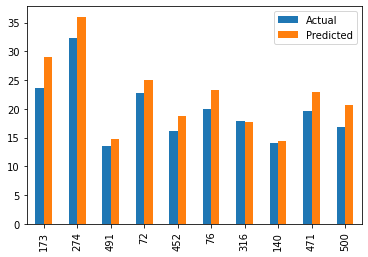

In [ ]:
df2.plot(kind='bar');

## <font color="red">Choosing the Best Model:</font> k-Fold Cross-Validation

- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
- It is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data.
- We use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.
- The biggest advantage of this method is that every data point is used for validation exactly once and for training `k-1` times.
- To choose the final model to use, we select the one that has the lowest validation error.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into `k` groups
3. For each unique group:
       3.1 Take the group as a hold out or test data set
       3.2 Take the remaining k-1 groups as a training data set
       3.3 Fit a model on the training set and evaluate it on the test set
       3.4 Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

How to choose **k**?
- A poorly chosen value for **k** may result in a mis-representative idea of the skill of the model, such as a score with a high variance, or a high bias.
- The choice of **k** is usually 5 or 10, but there is no formal rule. As **k** gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.
- A value of **k=10** is very common in the field of applied machine learning, and is recommend if you are struggling to choose a value for your dataset.

Below is the visualization of a k-fold validation when k=5.
![FIG_kFold](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)
Image Source: https://scikit-learn.org/



              Linear: -24.07, 11.53
               Lasso: -28.88, 10.90
          ElasticNet: -28.89, 10.17
               Ridge: -24.23, 11.80
       BayesianRidge: -24.88, 11.69
                 KNN: -44.99, 13.80
        DecisionTree: -23.44, 9.50
                 SVR: -71.30, 31.05
            AdaBoost: -15.83, 7.98
       GradientBoost: -12.44, 4.68
        RandomForest: -15.01, 7.71


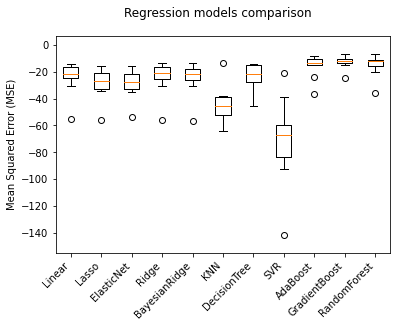

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# user variables to tune
seed    = 9
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = dict()
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["Ridge"]         = Ridge()
models["BayesianRidge"] = BayesianRidge()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()

# 10-fold cross validation for each model
model_results = list()
model_names   = list()
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed, shuffle=True)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{:>20}: {:.2f}, {:.2f}".format(model_name, round(results.mean(), 3), 
                                  round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure();
figure.suptitle('Regression models comparison');
ax = figure.add_subplot(111);
plt.boxplot(model_results);
ax.set_xticklabels(model_names, rotation = 45, ha="right");
ax.set_ylabel("Mean Squared Error (MSE)");
plt.margins(0.05, 0.1);
#plt.savefig("model_mse_scores.png")
plt.show();
#plt.clf()
#plt.close()

**Based on the above comparison, we can see that `Gradient Boosting Regression` model outperforms all the other regression models.**

## <font color="red">Model with Gradient Boosted Tree</font>


In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_predicted = gbr.predict(X_test)
gbr_expected = y_test

**Root Mean Square Error:**

In [ ]:
print("RMS: %r " % np.sqrt(np.mean((gbr_predicted - gbr_expected) ** 2)))

RMS: 2.5015311986262674 


**The coefficient of determination**: (1 is perfect prediction)

In [ ]:
print('Coeff of determination: {:.4f}'.format(metrics.r2_score(gbr_expected, gbr_predicted)))

Coeff of determination: 0.9147


#### Error Distribution

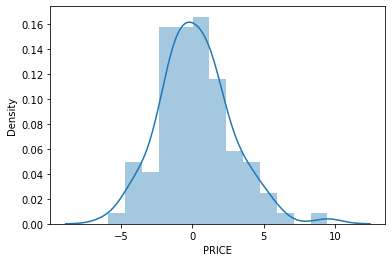

In [ ]:
sns.distplot(gbr_expected - gbr_predicted);

#### 45-Degree Plot

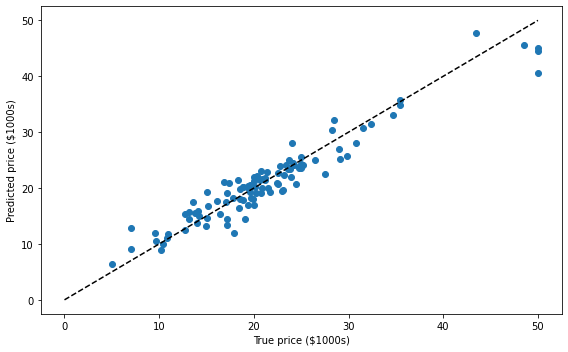

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(gbr_expected, gbr_predicted)
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel('True price ($1000s)');
plt.ylabel('Predicted price ($1000s)');
plt.tight_layout();

**Zoom in:**

In [ ]:
df1 = pd.DataFrame({'Actual': gbr_expected, 'Predicted': gbr_predicted})
df2 = df1.head(10)
df2

,Actual,Predicted
173,23.6,23.449761
274,32.4,31.461360
491,13.6,17.426077
72,22.8,24.022573
452,16.1,17.681144
76,20.0,22.031128
316,17.8,18.149588
140,14.0,13.830452
471,19.6,20.616193
500,16.8,21.042857


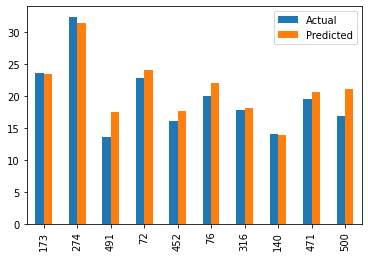

In [ ]:
df2.plot(kind='bar');

#### Feature Importance
- Once we have a trained model, we can understand feature importance (or variable importance) of the dataset which tells us how important each feature is, to predict the target.

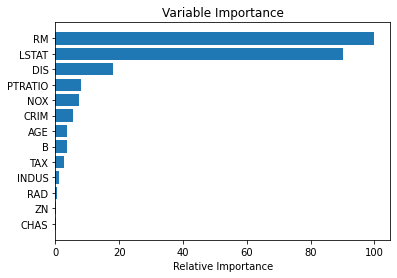

In [ ]:
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center');
plt.yticks(pos, boston_data.feature_names[sorted_idx]);
plt.xlabel('Relative Importance');
plt.title('Variable Importance');

**Plot training deviance:**

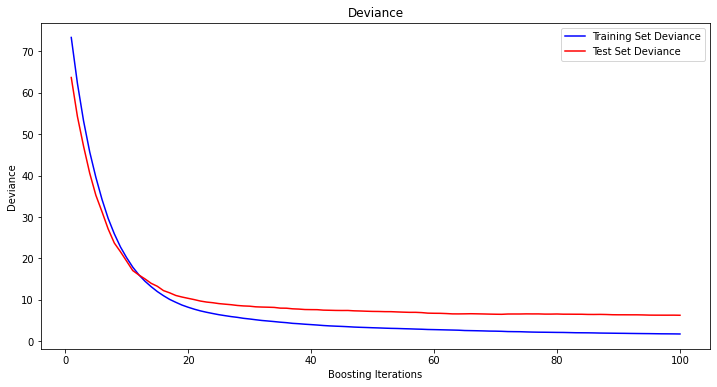

In [ ]:
n_estimators = 100
# compute test set deviance
test_score = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(gbr_expected, y_pred)

plt.figure(figsize=(12, 6));
plt.subplot(1, 1, 1);
plt.title('Deviance');
plt.plot(np.arange(n_estimators) + 1, 
         gbr.train_score_, 'b-',
         label='Training Set Deviance');
plt.plot(np.arange(n_estimators) + 1, 
         test_score, 'r-',
         label='Test Set Deviance');
plt.legend(loc='upper right');
plt.xlabel('Boosting Iterations');
plt.ylabel('Deviance');